<a href="https://colab.research.google.com/github/MahdiFaourr/MahdiFaourr/blob/main/diagnosis_of_diabetic_retinopathy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install opendatasets library
!pip install opendatasets

In [ ]:
/content/diagnosis-of-diabetic-retinopathy

In [2]:
# Import necessary libraries and functions
import opendatasets as od
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input, decode_predictions
import numpy as np
from keras.metrics import Precision
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np
import tensorflow as tf
from google.colab.patches import cv2_imshow
import cv2

In [ ]:
# Download the data from kaggle in the working directory
od.download("https://www.kaggle.com/datasets/pkdarabi/diagnosis-of-diabetic-retinopathy")

In [ ]:
# Initialize your ImageDatagenerator for image-augmentation (we use only rescaling)
datagen=ImageDataGenerator(rescale=1/255)
# Define train, valid, and test generators
train_generator=datagen.flow_from_directory("/content/diagnosis-of-diabetic-retinopathy/train",class_mode='binary',
                                            target_size=(224,224),batch_size=34)

valid_generator=datagen.flow_from_directory("/content/diagnosis-of-diabetic-retinopathy/valid",class_mode='binary',

                                            target_size=(224,224),batch_size=34)
test_generator=datagen.flow_from_directory("/content/diagnosis-of-diabetic-retinopathy/test",class_mode='binary',
                                           target_size=(224,224),batch_size=34)

In [ ]:
# Load MobileNetV1 base model without top (fully connected) layers
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Create a Sequential model
model = Sequential()

# Add the MobileNetV1 base model to the Sequential model
model.add(base_model)
# Set MobileNetV1 layers as non-trainable
for layer in base_model.layers:
    layer.trainable = False

# Add GlobalAveragePooling2D layer to reduce spatial dimensions
model.add(GlobalAveragePooling2D())

# Add custom dense layers for classification
model.add(Dense(220, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', Precision()])

In [ ]:
# Print model summary to see the architecture
model.summary()

In [ ]:
# Train the top layers of the model
history = model.fit(train_generator, epochs=10, validation_data=valid_generator)

In [24]:
# Evaluate on test_generator
model.evaluate(test_generator)

7/7 [==============================] - 11s 2s/step - loss: 0.1037 - accuracy: 0.9697 - precision: 0.9512


[0.10369362682104111, 0.9696969985961914, 0.9512194991111755]

In [ ]:
# Save the model
model.save('diabetic-retinopathy_model.h5')

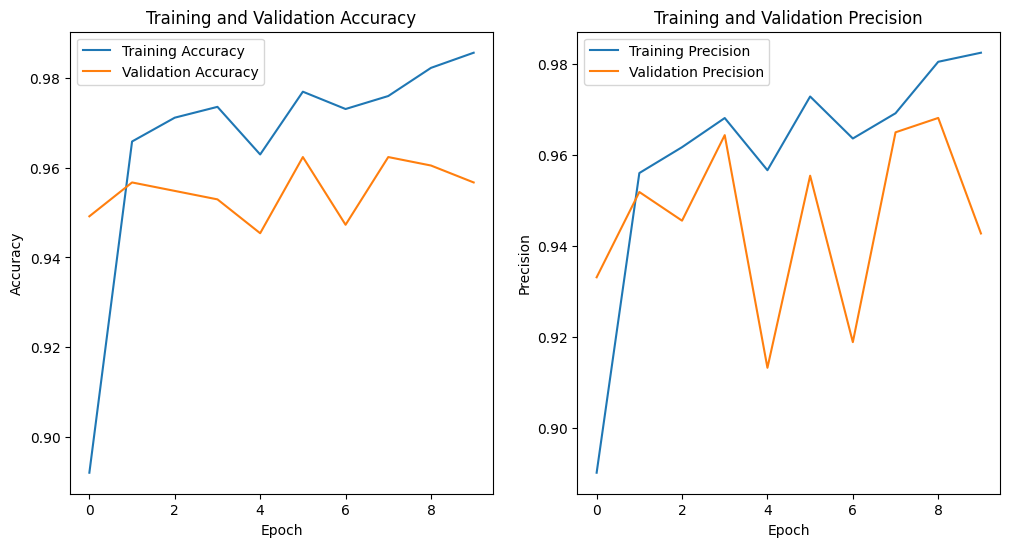

In [25]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation precision
plt.subplot(1, 2, 2)
plt.plot(history.history['precision'], label='Training Precision')
plt.plot(history.history['val_precision'], label='Validation Precision')
plt.title('Training and Validation Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()

plt.show()


In [79]:
def diabetic_retinopathy_detector(img_path):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))  # Adjust target_size as needed
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, 0)  # Add batch dimension
    img_array /= 255.0  # Normalize pixel values to the range [0, 1]
    # Make predictions
    predictions = model.predict(img_array)

    # The model has two classes (DR and NO-DR)
    class_labels = ['Diabetic-Retinopathy', 'No Diabetic-Rentinopayhy']
    if predictions[0,0]>0.5:
      print(f"The predicted class for the given image is: {class_labels[1]}")
    else:
      print(f"The predicted class for the given image is: {class_labels[0]}")

In [80]:
# Example usage 1
diabetic_retinopathy_detector("/content/diagnosis-of-diabetic-retinopathy/test/No_DR/005b95c28852_png.rf.7ae45fb5f30b5dbb5bf642868f29dbc5.jpg")

1/1 [==============================] - 0s 66ms/step
The predicted class for the given image is: No Diabetic-Rentinopayhy


In [81]:
# Example usage 2
diabetic_retinopathy_detector("/content/diagnosis-of-diabetic-retinopathy/test/DR/0104b032c141_png.rf.2b861f09f8526f5316cd44d8522bf62e.jpg")

1/1 [==============================] - 0s 96ms/step
The predicted class for the given image is: Diabetic-Retinopathy


In [82]:
# Example usage 3
diabetic_retinopathy_detector("/content/diagnosis-of-diabetic-retinopathy/valid/DR/58529a8638d0_png.rf.71365a7b9adc8587617b560e201dc686.jpg")

1/1 [==============================] - 0s 61ms/step
The predicted class for the given image is: Diabetic-Retinopathy


In [83]:
# Example usage 4
diabetic_retinopathy_detector("/content/diagnosis-of-diabetic-retinopathy/valid/No_DR/0212dd31f623_png.rf.028a049dec0104cc7507e305b3350ef1.jpg")

1/1 [==============================] - 0s 64ms/step
The predicted class for the given image is: No Diabetic-Rentinopayhy


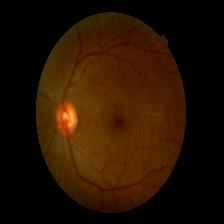

In [90]:
# Read an image
image_path = "/content/diagnosis-of-diabetic-retinopathy/test/No_DR/005b95c28852_png.rf.7ae45fb5f30b5dbb5bf642868f29dbc5.jpg"
image = cv2.imread(image_path)

# Display the image
cv2_imshow(image)
